In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
image_path = "test_images/CFD_035.jpg" 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image not found!")


cv2.imshow("Original Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.figure(figsize=(8, 6))
# plt.title("Original Image")
# plt.imshow(image, cmap="gray")
# plt.axis("off")
# plt.show()

In [12]:
# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=50.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

cv2.imshow("log_image", clahe_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Display
# plt.figure(figsize=(8, 6))
# plt.title("CLAHE Image")
# plt.imshow(clahe_image, cmap="gray")
# plt.axis("off")
# plt.show()

In [10]:
equalized_image = cv2.equalizeHist(image)


cv2.imshow("equalized_image", equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# plt.figure(figsize=(8, 6))
# plt.title("Histogram Equalized Image")
# plt.imshow(equalized_image, cmap="gray")
# plt.axis("off")
# plt.show()


In [44]:
# logarithmic transformation
c = 255 / (np.log(1 + np.max(clahe_image)))
log_image = c * np.log(1 + clahe_image.astype(np.float32))
log_image = np.uint8(log_image)


cv2.imshow("log_image", log_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.figure(figsize=(8, 6))
# plt.title("Logarithmic Transformation")
# plt.imshow(log_image, cmap="gray")
# plt.axis("off")
# plt.show()

In [16]:
# Bilateral Filter
bilateral_filtered_image = cv2.bilateralFilter(clahe_image, d=9, sigmaColor=36, sigmaSpace=19)


cv2.imshow("Bilateral Filtered Image", bilateral_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.figure(figsize=(8, 6))
# plt.title("Bilateral Filtered Image")
# plt.imshow(bilateral_filtered_image, cmap="gray")
# plt.axis("off")
# plt.show()


min = 136 & max = 255
min = 1 & max = 255


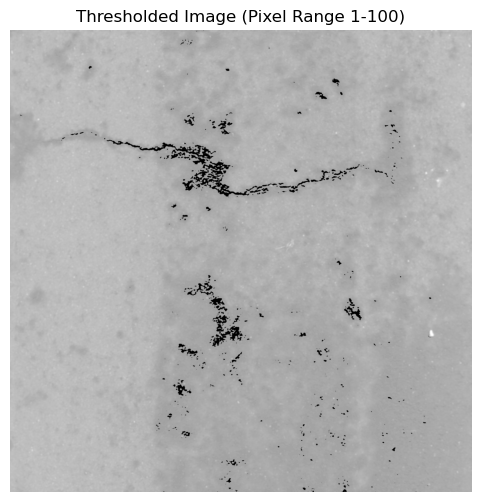

In [22]:
# Apply Threshold to keep pixel values between 0 and 100
filt_image = bilateral_filtered_image
print(f"min = {np.min(filt_image)} & max = {np.max(filt_image)}")
thresholded_image = np.where((filt_image >= 160) & (filt_image <= 255), filt_image, 1).astype(np.uint8)
print(f"min = {np.min(thresholded_image)} & max = {np.max(thresholded_image)}")

plt.figure(figsize=(8, 6))
plt.title("Thresholded Image (Pixel Range 1-100)")
plt.imshow(thresholded_image, cmap="gray")
plt.axis("off")
plt.show()

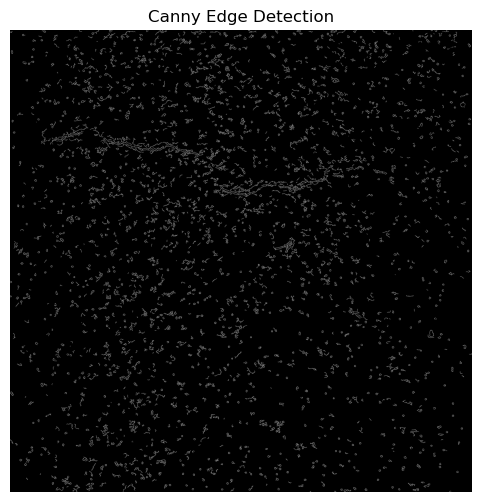

In [32]:
# Canny Algorithm
edges = cv2.Canny(bilateral_filtered_image, threshold1=25, threshold2=5)


plt.figure(figsize=(8, 6))
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()


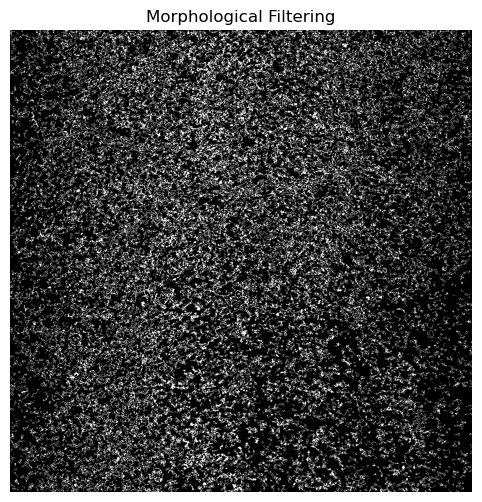

In [7]:
# Morphological Filtering
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphological_filtered_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.figure(figsize=(8, 6))
plt.title("Morphological Filtering")
plt.imshow(morphological_filtered_image, cmap="gray")
plt.axis("off")
plt.show()
